In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

In [3]:
## Note that textfile containing these data uses a tab delimiter to separate the label and message
sms = pd.read_csv("sms_spam.txt", sep='\t', names=['Label','Message'])

## Train-test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(sms, test_size=0.2, random_state=8)

## Split outcome from predictors
train_y = (train['Label'] == 'spam').astype(int)
train_msg = train['Message']

In [4]:
## Function to measure numbers
def get_num(text):
    return sum(map(str.isdigit, text))/len(text)

## Define "first_word" function
def first_word(text):
    return text.split(sep=' ')[0].lower().replace('!','')

## Recreate train_X using the new feature
d = {'prop_num': train_msg.apply(get_num),
    'first_word': train_msg.apply(first_word)}
train_X = pd.DataFrame(d)

## Apply OHE to the 'first' column and keep only "urgent" and "free"
from pandas import get_dummies
train_X_ohe = get_dummies(train_X, columns=['first_word'])
train_X = train_X_ohe[['prop_num','first_word_urgent','first_word_free']]

In [5]:
train_X

,prop_num,first_word_urgent,first_word_free
3922,0.017857,0,0
2559,0.000000,0,0
2672,0.000000,0,0
4282,0.006579,0,0
987,0.000000,0,0
...,...,...,...
2181,0.000000,0,0
2409,0.000000,0,0
2033,0.000000,0,0
1364,0.000000,0,0


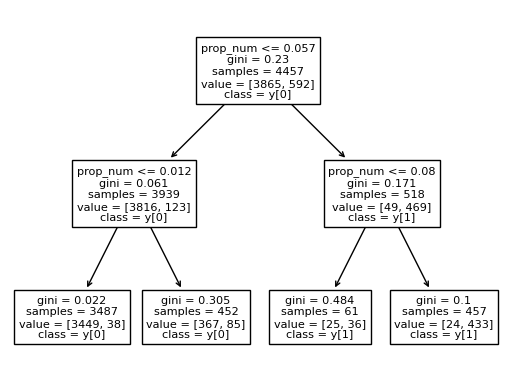

In [6]:
from sklearn.tree import DecisionTreeClassifier
my_tree = DecisionTreeClassifier(max_depth = 2).fit(train_X, train_y)
## Plot
from sklearn.tree import plot_tree
plot_tree(my_tree, feature_names=train_X.columns, class_names=True)
plt.show()

#question 1
#Part A) Notice that the final prediction for the two terminal nodes on the left side of the tree is "not spam", and the prediction for the rightmost two nodes is "spam". Does this mean that the second round of splits are inconsequential? Briefly explain.

we found the second round of splits to be inconsequential because it does not help in further dividing the classes; 
the second round of splits is simply creating the subclasses for each classes. 

#question 1
#Part B)Verify that the gini impurity before any splits have occured is 0.2303647 (which was rounded in the plotted tree) by performing the calculation yourself using the value information in the tree.

In [7]:
gini_impurity = (3865/4457)*(1-(3865/4457)) + (592/4457)*(1-(592/4457))
print(f'gini impurity is {gini_impurity}')

gini impurity is 0.23036470098514214


In [19]:
#question 1
#Part c)
## Code for Part C
pred_probs = my_tree.predict_proba(train_X)
np.unique(pred_probs, axis=0)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- prop_alpha
Feature names seen at fit time, yet now missing:
- first_word_free
- first_word_urgent


the values of four unique rows correspond to the probability of the spam/non-spam for the four classes that we have as the result of our three splits. 

#question 2-a.

In [12]:
## Function to measure special characters
def alpha_percent(text):
    return sum(map(str.isalnum, text))/len(text)

## Recreate train_X using this new feature (dropping the first words)
d = {'prop_num': train_msg.apply(get_num),
    'prop_alpha': train_msg.apply(alpha_percent)}
train_X = pd.DataFrame(d)

In [11]:
tree_2a = DecisionTreeClassifier(max_depth = 2).fit(train_X, train_y)

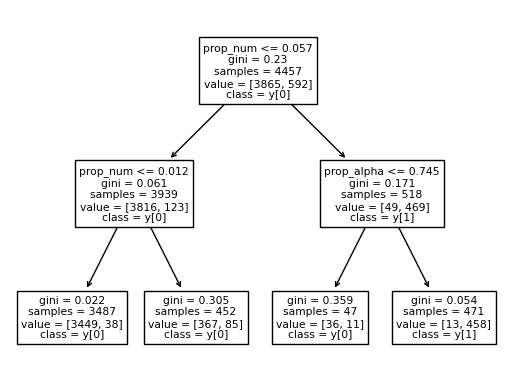

In [18]:
plot_tree(tree_2a, feature_names=train_X.columns, class_names=True)
plt.show()

#part 2-b

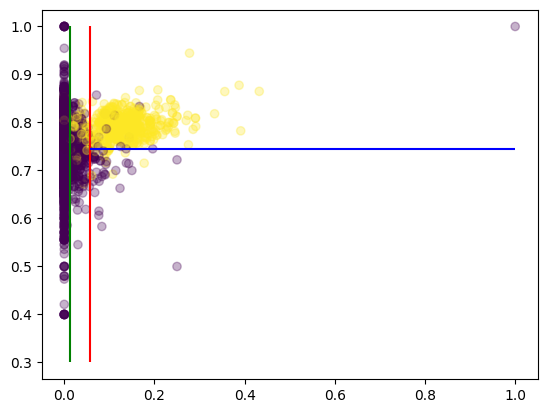

In [33]:
plt.scatter(train_X['prop_num'], train_X['prop_alpha'], c = train_y,  cmap='viridis', alpha = 0.3)
plt.vlines(x = [0.057], ymin = 0.3, ymax = 1, color = ["red"])
plt.vlines(x = [0.012], ymin = 0.3, ymax = 1, color = ["green"])
plt.hlines(y = [0.745], xmin = 0.057, xmax = 1, color = ["blue"])

#part 3-a

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

pipe = Pipeline([
('tree', DecisionTreeClassifier())
])

parms = {'tree__max_depth': [2,3,4,5,6],
        'tree__min_samples_split': [20,40,60,80,100],
         'tree__min_impurity_decrease': [0.00001,0.0001,0.001,0.01]}

grid_res = GridSearchCV(pipe, parms, cv=5, scoring = 'f1').fit(train_X, train_y)
print(grid_res.best_estimator_)
print(grid_res.best_score_)

Pipeline(steps=[('tree',
                 DecisionTreeClassifier(max_depth=4,
                                        min_impurity_decrease=1e-05,
                                        min_samples_split=80))])
0.8667592885318941


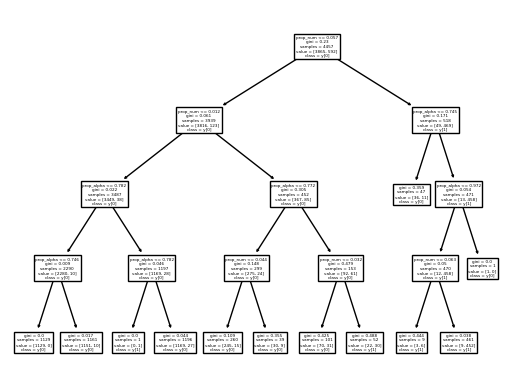

In [40]:
#3-b
plot_tree(grid_res.best_estimator_[0], feature_names=train_X.columns, class_names=True)
plt.show()

# this tree is much deeper with a depth of 4

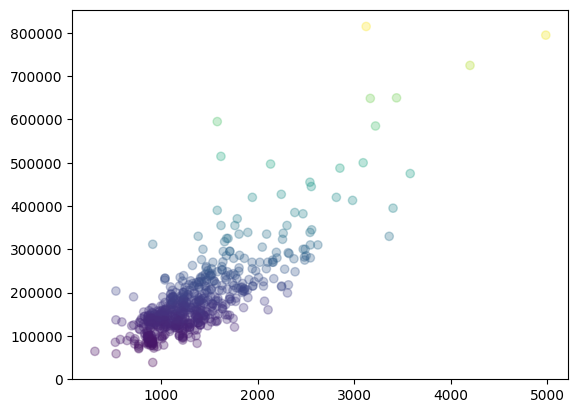

In [48]:
#4-a

## Read IC home sales data and split into training/test
ic = pd.read_csv("IowaCityHomeSales.csv")
train_ic, test_ic = train_test_split(ic, test_size=0.2, random_state=7)

## Create X and y
train_ic_y = train_ic['sale.amount']
train_ic_X = train_ic[['area.living','bedrooms']]

plt.scatter(train_ic_X['area.living'], train_ic_y, c = train_ic_y,  cmap='viridis', alpha = 0.3)

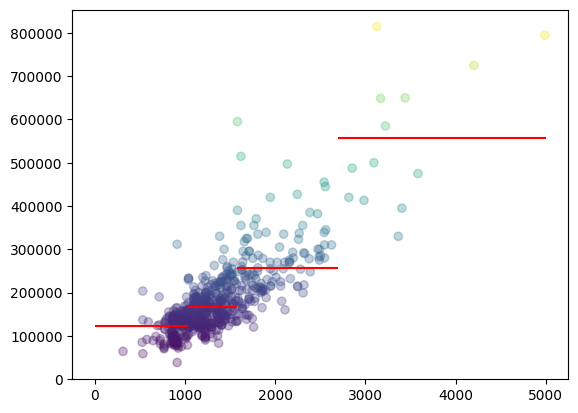

In [55]:
#4-b
plt.scatter(train_ic_X['area.living'], train_ic_y, c = train_ic_y,  cmap='viridis', alpha = 0.3)
plt.hlines(y = [121427.919], xmin = 0, xmax = 1035.5, color = ["red"])
plt.hlines(y = [165998.529], xmin = 1035.5, xmax = 1578.5, color = ["red"])
plt.hlines(y = [257425.787], xmin = 1578.5, xmax = 2700, color = ["red"])
plt.hlines(y = [556857.696], xmin = 2700, xmax = 5000, color = ["red"])
# plt.vlines(x = [1578.5, 1035.5, 2720], ymin = 0, ymax = 800000, color = ["red"])

# 4-c
- Strengths
    - interpretable, easy to understand 
    - works well with the data especially when the two varaibles are haaving a linear relationship
- Weaknesses
    - assumes that we can represent the relationship by averaging the targets in each reigion 


In [ ]:
#4-d


In [ ]:
#5-a

train_ic_X = train_ic[['built', 'bedrooms', 'area.base', 'area.living', 'area.garage1', 'area.lot']]

pipe = Pipeline([
('tree', DecisionTreeClassifier())
])

parms = {'tree__max_depth': [2,3,4,5,6],
        'tree__min_samples_split': [20,40,60,80,100]}

grid_res = GridSearchCV(pipe, parms, cv=5, scoring = 'f1').fit(train_X, train_y)
print(grid_res.best_estimator_)
print(grid_res.best_score_)
